In [1]:
import numpy as np
import matplotlib.pyplot as plt

from random import randint
from sklearn.datasets import make_classification

In [2]:
n_samples = 100
n_features = 2
n_informative = 2
n_redundant = 0
n_clusters_per_class = 1
class_sep = 2
random_state = randint(0, 10000)

X, y = make_classification(
    n_samples=n_samples,
    n_features=n_features,
    n_informative=n_informative,
    n_redundant=n_redundant,
    n_clusters_per_class=n_clusters_per_class,
    class_sep=class_sep,
    random_state=random_state
)

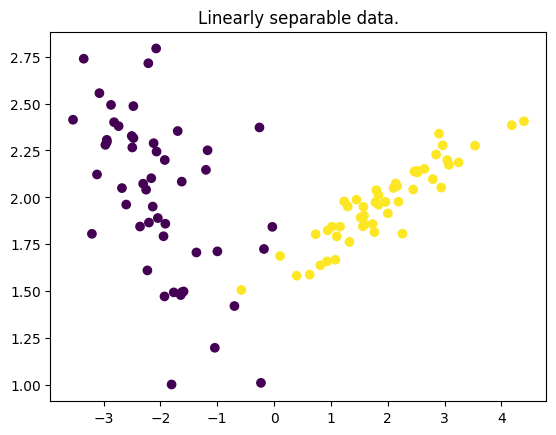

In [3]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.title('Linearly separable data.')
plt.show()

In [4]:
weights = np.ones((X.shape[1] + 1, 1))

In [5]:
weights

array([[1.],
       [1.],
       [1.]])

In [6]:
x_bias = np.hstack((np.ones((X.shape[0], 1)), X))

In [7]:
weights

array([[1.],
       [1.],
       [1.]])

In [8]:
x_bias

array([[ 1.        , -3.5378896 ,  2.41392916],
       [ 1.        , -0.69752962,  1.42092185],
       [ 1.        , -1.91344568,  1.85970741],
       [ 1.        ,  1.83697358,  1.96106556],
       [ 1.        ,  3.53601971,  2.27569102],
       [ 1.        ,  2.52276335,  2.13276344],
       [ 1.        ,  2.96606283,  2.2776921 ],
       [ 1.        ,  4.18374649,  2.38489995],
       [ 1.        ,  2.94122933,  2.05245288],
       [ 1.        , -2.67672145,  2.04959355],
       [ 1.        ,  0.62706175,  1.58844999],
       [ 1.        ,  0.10659335,  1.68749965],
       [ 1.        ,  1.57183686,  1.949735  ],
       [ 1.        ,  1.73372764,  1.85821957],
       [ 1.        , -1.36636893,  1.7065603 ],
       [ 1.        ,  2.51845817,  2.14142601],
       [ 1.        , -1.69562899,  2.3536741 ],
       [ 1.        , -3.3492213 ,  2.73910723],
       [ 1.        ,  1.23411954,  1.97851243],
       [ 1.        ,  1.52254741,  1.89285555],
       [ 1.        , -2.96854956,  2.280

In [9]:
x_bias[y.T==0] = -x_bias[y.T==0]

In [10]:
x_bias

array([[-1.        ,  3.5378896 , -2.41392916],
       [-1.        ,  0.69752962, -1.42092185],
       [-1.        ,  1.91344568, -1.85970741],
       [ 1.        ,  1.83697358,  1.96106556],
       [ 1.        ,  3.53601971,  2.27569102],
       [ 1.        ,  2.52276335,  2.13276344],
       [ 1.        ,  2.96606283,  2.2776921 ],
       [ 1.        ,  4.18374649,  2.38489995],
       [ 1.        ,  2.94122933,  2.05245288],
       [-1.        ,  2.67672145, -2.04959355],
       [ 1.        ,  0.62706175,  1.58844999],
       [ 1.        ,  0.10659335,  1.68749965],
       [ 1.        ,  1.57183686,  1.949735  ],
       [ 1.        ,  1.73372764,  1.85821957],
       [-1.        ,  1.36636893, -1.7065603 ],
       [ 1.        ,  2.51845817,  2.14142601],
       [-1.        ,  1.69562899, -2.3536741 ],
       [-1.        ,  3.3492213 , -2.73910723],
       [ 1.        ,  1.23411954,  1.97851243],
       [ 1.        ,  1.52254741,  1.89285555],
       [-1.        ,  2.96854956, -2.280

In [11]:
learning_rate = .02
duration = 100

In [16]:
learning_term = learning_rate/2
for _ in range(duration):
    hard_limiter = np.where(x_bias@weights>0, 1, -1)
    weights = weights + x_bias.T@(learning_term * (1 - hard_limiter))

In [17]:
weights

array([[ 0.56      ],
       [ 0.99924214],
       [-0.29884504]])

# plot

In [18]:
x1_vals = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1, 100)
x2_vals = - (weights[0] + weights[1] * x1_vals) / weights[2]

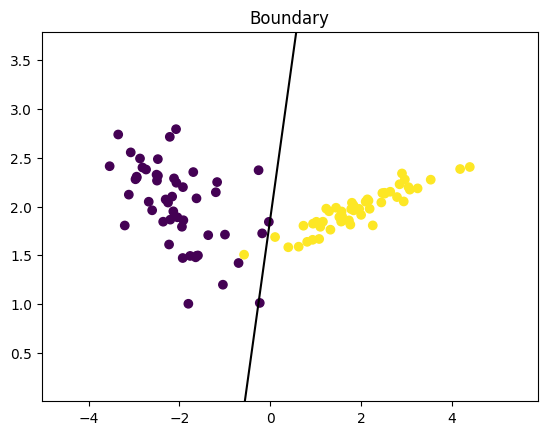

In [20]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.plot(x1_vals, x2_vals, 'k-')
plt.ylim(min(X[:, 1]) - 1, max(X[:, 1]) + 1)
plt.title('Boundary')
plt.show()

In [27]:
weights

array([[ 0.6       ],
       [-1.20618019],
       [-0.13683823]])